# Lecture - Pandas basics

- pandas.Series
- pandas.DataFrame
- read_csv
- indexing
- plotting

## Pandas Series

- can create from dictionary
- can create from list
- can create from np.array

In [3]:
import pandas as pd 

programs_dict = dict(AI = 26, NET = 38, Java = 30, UX = 28)

programs_series = pd.Series(programs_dict)

programs_series

AI      26
NET     38
Java    30
UX      28
dtype: int64

In [13]:

# extract values through indexing 
print(f"{programs_series[0] = }")
print(f"{programs_series[-1] = }")

print(f"{programs_series['UX'] = }")

# get keys 
print(f"{programs_series.keys() = }")
print(f"{programs_series.keys()[0] = }")

programs_series[0] = 26
programs_series[-1] = 28
programs_series['UX'] = 28
programs_series.keys() = Index(['AI', 'NET', 'Java', 'UX'], dtype='object')
programs_series.keys()[0] = 'AI'


In [29]:
import random as rnd 

# for reproducibility - gets same set of values
rnd.seed(1337)

dice_series = pd.Series([rnd.randint(1,6) for _ in range(10)])
dice_series.head() # inspects the five first rows

0    5
1    5
2    6
3    3
4    5
dtype: int64

In [31]:
dice_series

0    5
1    5
2    6
3    3
4    5
5    5
6    6
7    2
8    3
9    4
dtype: int64

In [36]:
print(f"{dice_series.min() = }")
print(f"{dice_series.argmin() = }") # gives index for min value
print(f"{dice_series.max() = }") 
print(f"{dice_series.mean() = }") # average  
print(f"{dice_series.median() = }") # sort all values in order - pick the middle one, if middle are 2 numbers calculate average of them

dice_series.min() = 2
dice_series.argmin() = 7
dice_series.max() = 6
dice_series.mean() = 4.4
dice_series.median() = 5.0


---
## DataFrame

- tabular data with rows and columns 
- analog to 2D numpy arrays with flexible row indices and col names
- "specialized" dictionary with col name mapped to a Series object

In [40]:
# instantiated a DataFrame from a Series object
df_programs = pd.DataFrame(programs_series, columns=("Number_of_students",))
df_programs

,Number_of_students
AI,26
NET,38
Java,30
UX,28


In [58]:
# create 2 Series objects 
students = pd.Series({"AI": 26, "NET": 38, "UX": 28, "Java": 30})
skills = pd.Series({"AI": "Python", "net": "C#", "UX": "Figma", "Java": "Java"})

# create a DataFrame from 2 Series objects
df_programs = pd.DataFrame({"Students": students, "Skills": skills })
df_programs

,Students,Skills
AI,26.0,Python
Java,30.0,Java
NET,38.0,NaN
UX,28.0,Figma
net,NaN,C#


In [59]:
df_programs["Students"]

AI      26.0
Java    30.0
NET     38.0
UX      28.0
net      NaN
Name: Students, dtype: float64

In [60]:
df_programs["Students"].mean(), (26+30+38+28)/4

(30.5, 30.5)

In [57]:
median_student_number = df_programs["Students"].median()
print(f"Median students in the programs {df_programs.index.to_list()} is {median_student_number:.0f}")

Median students in the programs ['AI', 'NET', 'UX', 'Java'] is 29


In [62]:
# create 2 Series objects 
students = pd.Series({"AI": 26, "NET": 38, "UX": 28, "Java": 30})
skills = pd.Series({"AI": "Python", "NET": "C#", "UX": "Figma", "Java": "Java"})

# create a DataFrame from 2 Series objects
df_programs = pd.DataFrame({"Students": students, "Skills": skills })
df_programs

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
Java,30,Java


In [66]:
df_programs["Skills"]

AI      Python
NET         C#
UX       Figma
Java      Java
Name: Skills, dtype: object

In [68]:
df_programs["Skills"][0], df_programs["Skills"]["AI"], df_programs["Skills"]["UX"],  


('Python', 'Python', 'Figma')

## Indexers 

- loc - slicing and indexing using explicit index
- iloc - slicing and indexing using Python-style index

In [70]:
df_programs

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
Java,30,Java


In [71]:
df_programs.loc["AI"] # returns a Series object

Students        26
Skills      Python
Name: AI, dtype: object

In [73]:
df_programs.loc["Java"]

Students      30
Skills      Java
Name: Java, dtype: object

In [82]:
df_programs.loc[["AI", "UX"]]

,Students,Skills
AI,26,Python
UX,28,Figma


In [75]:
df_programs.iloc[1:3] # returns a DataFrame object

,Students,Skills
NET,38,C#
UX,28,Figma


## Masking

In [76]:
df_programs

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
Java,30,Java


In [77]:
df_programs["Students"] >= 30

AI      False
NET      True
UX      False
Java     True
Name: Students, dtype: bool

In [80]:
# using masking to filter the DataFrame
df_programs_over_29 = df_programs[df_programs["Students"] >= 30]
df_programs_over_29

,Students,Skills
NET,38,C#
Java,30,Java


In [79]:
df_programs

,Students,Skills
AI,26,Python
NET,38,C#
UX,28,Figma
Java,30,Java


---
## Excel data

In [90]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_excel("../Data/calories.xlsx")
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [92]:
df.shape # (rows, columns)

(2225, 5)

In [94]:
# liquid food and solid food
df["FoodCategory"].unique()

array(['CannedFruit', 'Fruits', 'Tropical&ExoticFruits', 'PotatoProducts',
       'Vegetables', 'FastFood', 'Pizza', 'Cheese', 'CreamCheese',
       'Milk&DairyProducts', 'SlicedCheese', 'Yogurt', 'Beef&Veal',
       'ColdCuts&LunchMeat', 'Meat', 'Offal&Giblets', 'Pork',
       'Poultry&Fowl', 'Sausage', 'Venison&Game', 'Cakes&Pies',
       'Candy&Sweets', 'IceCream', '(Fruit)Juices',
       'AlcoholicDrinks&Beverages', 'Beer',
       'Non-AlcoholicDrinks&Beverages', 'Soda&SoftDrinks', 'Wine',
       'CerealProducts', 'Oatmeal,Muesli&Cereals', 'Pasta&Noodles',
       'Dishes&Meals', 'Soups', 'Legumes', 'Nuts&Seeds', 'Oils&Fats',
       'VegetableOils', 'BakingIngredients', 'Fish&Seafood',
       'Herbs&Spices', 'Pastries,Breads&Rolls', 'Sauces&Dressings',
       'Spreads'], dtype=object)

In [96]:
df["per100grams"].unique()

array(['100g', '100ml'], dtype=object)

## Data cleaning and explorations

- type convert string objects with numerical values to int
- change column names
- separate into liquids and solids



In [97]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [104]:
# renaming columns
df = df.rename(
    dict(Cals_per100grams="Calories", KJ_per100grams="kJ", per100grams="per100"),
    axis="columns",
)

df.head()


,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [115]:
# converting Calories to int
df["Calories"] = df["Calories"].str[:-3].astype(int)
df.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [117]:
df["Calories"].head()

0    62
1    48
2    92
3    88
4    54
Name: Calories, dtype: int32

In [119]:
# counts the frequency of each unique element
df["per100"].value_counts()

100g     1802
100ml     423
Name: per100, dtype: int64

In [123]:
(df["per100"] == "100g").value_counts()

True     1802
False     423
Name: per100, dtype: int64

In [129]:
# separate liquids and solids
# filter out all solids
df_solids = df[df["per100"] == "100g"]

# filter out all liquids
df_liquids = df[df["per100"] == "100ml"]

df_liquids.head()

,FoodCategory,FoodItem,per100,Calories,kJ
409,Milk&DairyProducts,Almond Milk,100ml,17,71 kJ
410,Milk&DairyProducts,Buttermilk,100ml,62,260 kJ
412,Milk&DairyProducts,Coconut Milk,100ml,230,966 kJ
422,Milk&DairyProducts,Hot Chocolate,100ml,89,374 kJ
423,Milk&DairyProducts,Kefir,100ml,55,231 kJ


In [130]:
df_solids.head()

,FoodCategory,FoodItem,per100,Calories,kJ
0,CannedFruit,Applesauce,100g,62,260 kJ
1,CannedFruit,Canned Apricots,100g,48,202 kJ
2,CannedFruit,Canned Blackberries,100g,92,386 kJ
3,CannedFruit,Canned Blueberries,100g,88,370 kJ
4,CannedFruit,Canned Cherries,100g,54,227 kJ


In [131]:
# check that we only have 100g in per100
df_solids["per100"].value_counts()

100g    1802
Name: per100, dtype: int64

## Assignment from stakeholder (body builder)

- find the most calory rich solid
- find the most calory rich liquids

In [135]:
df_solids.sort_values(by="Calories")

,FoodCategory,FoodItem,per100,Calories,kJ
1816,BakingIngredients,Baking Soda,100g,0,0 kJ
2043,Herbs&Spices,Stevia,100g,0,0 kJ
2004,Herbs&Spices,Garlic Salt,100g,0,0 kJ
2040,Herbs&Spices,Sea Salt,100g,0,0 kJ
2038,Herbs&Spices,Salt,100g,0,0 kJ
...,...,...,...,...,...
675,Pork,Lard,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ


In [141]:
solids_sorted_calories = df_solids.sort_values(by="Calories", ascending = False) # ascending - False -> descending
solids_sorted_calories.iloc[:10]

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ
675,Pork,Lard,100g,898,3772 kJ
1897,BakingIngredients,Vegetable Oil,100g,884,3713 kJ
1898,BakingIngredients,Vegetable Shortening,100g,884,3713 kJ
527,Beef&Veal,Beef Suet,100g,854,3587 kJ
1768,Oils&Fats,Real Butter,100g,720,3024 kJ


In [169]:
solids_top5_calories = solids_sorted_calories.head()
solids_top5_calories

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


In [170]:
liquids_top5_calories = df_liquids.sort_values(by="Calories", ascending = False).head()
liquids_top5_calories

,FoodCategory,FoodItem,per100,Calories,kJ
1751,Oils&Fats,Cod Liver Oil,100ml,1000,4200 kJ
1808,VegetableOils,Wheat Germ Oil,100ml,929,3902 kJ
1800,VegetableOils,Salmon Oil,100ml,911,3826 kJ
1789,VegetableOils,Menhaden Oil,100ml,911,3826 kJ
1759,Oils&Fats,Herring Oil,100ml,902,3788 kJ


In [171]:
df["FoodCategory"].value_counts()

BakingIngredients                95
Cakes&Pies                       91
Herbs&Spices                     90
Beer                             85
Candy&Sweets                     81
Pastries,Breads&Rolls            78
Dishes&Meals                     78
Oatmeal,Muesli&Cereals           76
FastFood                         72
Vegetables                       63
Legumes                          62
Fish&Seafood                     60
Fruits                           54
Sauces&Dressings                 54
Cheese                           53
Soups                            52
Non-AlcoholicDrinks&Beverages    51
AlcoholicDrinks&Beverages        48
Sausage                          47
(Fruit)Juices                    46
Meat                             46
IceCream                         45
Soda&SoftDrinks                  45
CerealProducts                   44
Pizza                            43
Pasta&Noodles                    40
Yogurt                           40
Nuts&Seeds                  

In [172]:
# top five food categories by calories
top5_category_median = df.groupby("FoodCategory").median("Calories").sort_values(by = "Calories", ascending=False).head().reset_index()
top5_category_median

,FoodCategory,Calories
0,VegetableOils,884.0
1,Oils&Fats,883.0
2,Nuts&Seeds,534.0
3,Candy&Sweets,448.0
4,"Oatmeal,Muesli&Cereals",373.5


In [173]:
solids_top5_calories

,FoodCategory,FoodItem,per100,Calories,kJ
1621,Soups,Goulash,100g,1009,4238 kJ
1761,Oils&Fats,Lard,100g,902,3788 kJ
528,Beef&Veal,Beef Tallow,100g,902,3788 kJ
1756,Oils&Fats,Goose Fat,100g,898,3772 kJ
599,Meat,Chicken Fat,100g,898,3772 kJ


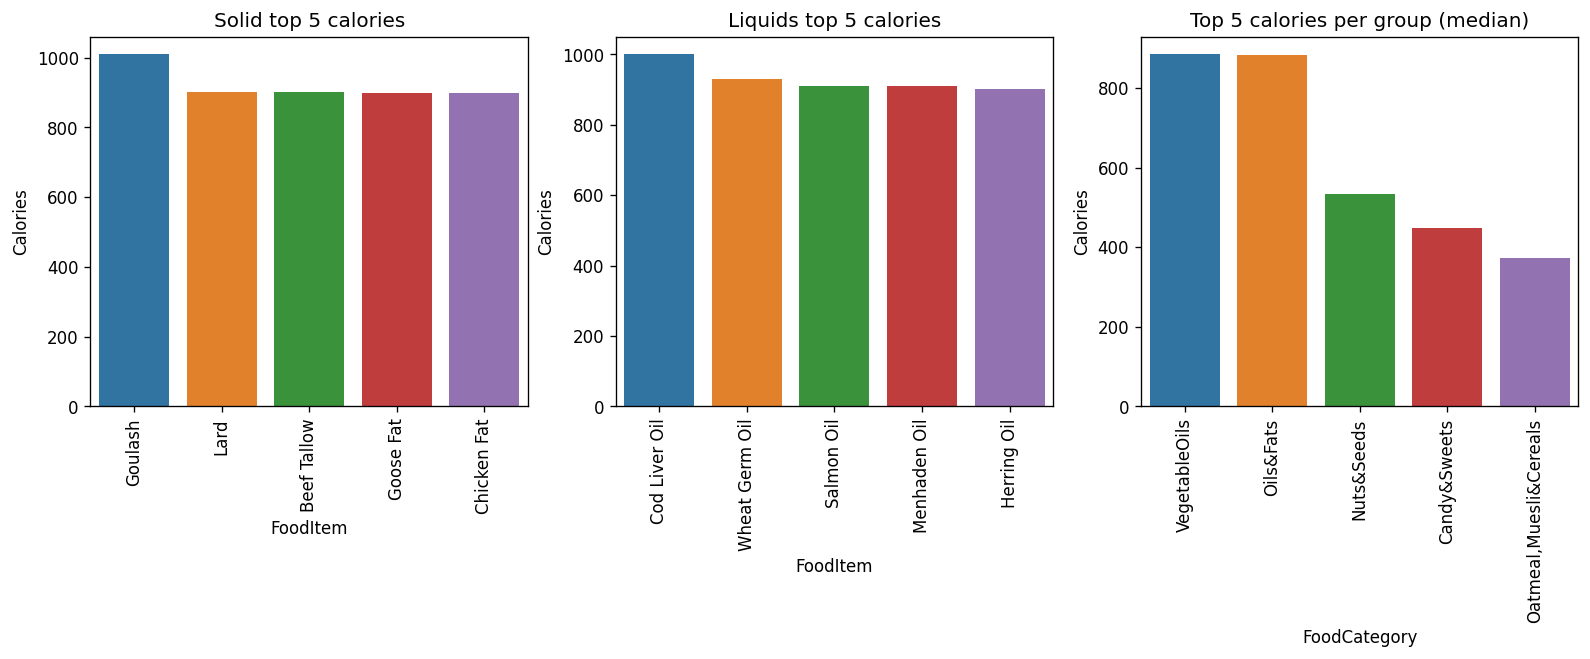

In [179]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4), dpi=120)
titles = ["Solid top 5 calories", "Liquids top 5 calories", "Top 5 calories per group (median)"]
data_frames = (solids_top5_calories, liquids_top5_calories, top5_category_median)
x_columns = ["FoodItem", "FoodItem", "FoodCategory"]


for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, x = x_columns[i], y = "Calories", ax = axes[i])
    axes[i].set(title = title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)

plt.savefig("../assets/top_calories_food.png", facecolor = "white", bbox_inches = "tight")